# Causal Inference with Python

# Table Of Contents
[1. Introduction](#1.Introduction)\
[2. The constraints](#2.The_constraints )\
[3. Required Installation](#3.-Required_Installation)\
[4. Importing Libraries](#4.-Importing_Libraries)\
[5. The structure of our causal model](#4.-The_structure_of_our_causal_model)\
[6. Data collection and Filtering](#4.-Data_collection_and_Filtering)\
[7. Preparation of Data for Visualization](#7.-Preparation_of_Data_for_Visualization)\
[8. Trend of the Data](#8.-Trend_of_the_Data)\
[9. Causal Analysis](#9.-Causal_Analysis)\
[10. Conclusion based on output](#10.-Conclusion_based_on_output)

# 1. Introduction
People are eager to comprehend the reasons behind events and the potential outcomes of different actions. It is commonly believed that statistics can merely indicate correlations or associations, failing to explain causation. However, Causal Inference is a method that addresses these inquiries by determining causality between variables and predicting potential outcomes. This presentation aims to guide us in approaching and analyzing such questions with the assistance of our data and widely used Python libraries.

So Causal Inference is the process of :
- Using the model
- Once we have the model, discover the process of learning the model from the data, and
- Elicitation is the process of learning the model from the domain experts.

There is one experimental design that people widely understand to establish a causal relationship called RCT(Randomized Controlled Trials). 

### RCT 
 The population can be divided into two groups:
 - Control and
 - Treatment.

But Randomization can control significant differences between groups due to intervention, and not to the other variables. Unless we have time travel we can't intervene in the past. 
- For example,
- i. We can't give people disease or deny treatment.
- ii. What will happen after 20 years to those who used to smoke 25 cigarettes a day?  

So, still, we model Causality? The answer is "Yes".

### Causality without RCT
We need to have two things to go without RCT: 
- i. Some Data; and
- ii. Confounding variable - An unquantifiable factor that impacts both the alleged cause and outcome.

### Opportunities
- Industry;
- Infrastructure;
- Medicine;
- Environmental Research

#  2. The constraints 
The constraints of machine learning in tackling causal issues bring up the inquiry: how can we effectively model a causal problem?

Imagine being a proficient marketer utilizing technology to improve the efficiency of our email campaigns. How would we tackle this challenge? When formulating our campaign strategy, it is essential to determine the impact of sending personalized emails on a customer's probability of making a purchase. Essentially, we are interested in understanding if a customer is more likely to purchase after receiving a personalized email.

### The structural approach of Causel Relationship: 

- Directed Acyclic Graph (DAG) to visually represent the connections between variables in a loop-free manner. This graphical representation aids in comprehending the relationships among different factors. Subsequently, we devise a plan and establish measurement criteria based on the hypotheses presented in the diagram. This includes determining how variables and outcomes will be assessed and outlining a clear course of action. 

- Valuable insights into their efficacy following that, we proceed to estimation, where we gauge the impact of our interventions. This phase enables us to quantify the effects generated by our actions, offering valuable insights into their efficacy. 

- Finally, we conduct refutation to validate our hypotheses. This entails thoroughly scrutinizing our results to ensure they are consistent with our expectations and are substantiated by the data.

# 3.Required Installation
!pip install pycausalimpact

# 4. Importing Libraries

Since we are working with a Time-series dataset, we have opted to utilize the CausalImpact library created by Google. The primary objective of this algorithm is to estimate the impact of a specific intervention or action on a response variable by examining disparities between expected and observed time series data. This method is commonly employed to assess the influence of marketing interventions on businesses, enabling predictions of expected revenue from a particular campaign or providing a more precise evaluation of revenue generated by disabling a specific channel entirely.

In [1]:
# Library import

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from causalimpact import CausalImpact

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the DataFrame 'Sales Data set'

df = pd.read_csv("sales data-set.csv")
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


# 5.The structure of our causal model
When it comes to Causal Inference, our understanding heavily depends on the prior knowledge of the causal model structure. This information can be presented in different ways, but in DoWhy, it is essential to specify a DAG (Directed Acyclic Graph). A Graph consists of Nodes (also called vertices) and Edges connecting them. Directed indicates that each edge has a specific direction, from the cause to the effect. Acyclic implies that the graph should not contain any cycles or loops. In this scenario, the Nodes represent the columns in the data file, which are also referred to as Variables.

In [3]:
graph_str = """digraph {

Store;
Weekly_Sales;
Date;
Dept;
IsHoliday;


Store -> Weekly_Sales;
IsHoliday-> Weekly_Sales;
Dept -> Weekly_Sales;
Date -> Weekly_Sales;

IsHoliday -> Store;
IsHoliday -> Date;
Dept -> Date;

}"""

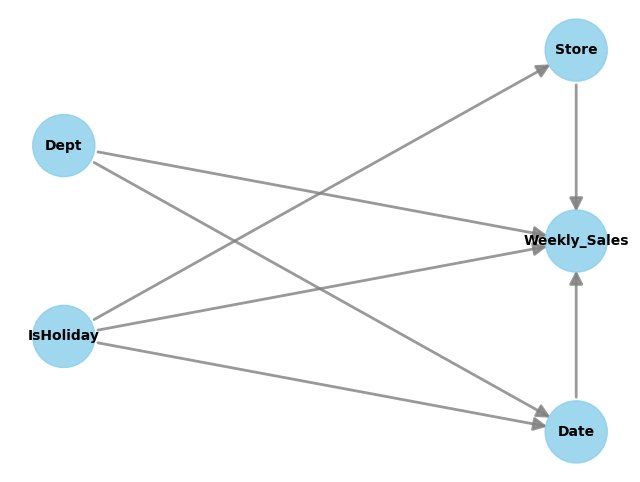

In [4]:
from dowhy import CausalModel

treatment_col = 'Store'
outcome_col = 'Weekly_Sales'
model=CausalModel(
    data = df,
    treatment=treatment_col,
    outcome=outcome_col,
    graph=graph_str)

model.view_model()

# 6. Data collection and Filtering
Upon collecting fundamental details such as the dataset size and column datatypes, we shall proceed to make necessary adjustments to the datatypes for better usability in the future. Additionally, we will explore the count of unique Stores and Departments in the dataset.

In [5]:
df['Store'] = df['Store'].astype('category')
df['Dept'] = df['Dept'].astype('string')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

print("Total number of stores:", df.Store.nunique())
print("Total number of departments:", df.Dept.nunique())

Total number of stores: 45
Total number of departments: 81


# 7. Preparation of Data for Visualization

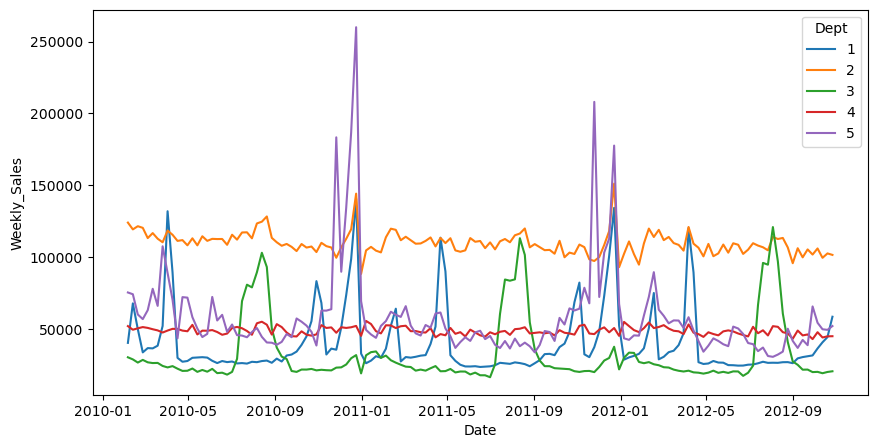

In [6]:
df_sales_new=df[(df['Store'] == 10) & (df['Dept'].isin(['1', '2', '3', '4','5' ]))].drop(columns=['IsHoliday'])
df_sales_new['Date'] = pd.to_datetime(df_sales_new['Date'])
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sales_new, x='Date', y='Weekly_Sales',hue="Dept")
plt.show()

# 8. Trend of the Data:

1) Department 1: Sales show a significant increase in April, with another peak towards the end of the year in November and December.

2) Department 2: Sales steadroserise until September, followed by a notable surge in December.

3) Department 3: Sales remain stable, with substantial increases noted in August and September, along with a minor uptick in December and January. This department likely specializes in educational and stationery products.

4) Department 4: Sales in this department have consistently followed a steady trajectory over the years, with minor fluctuations.

5) Department 5: Sales for thiexperiencedexperience a spike in the early months of the year, followed by a substantial increase in December.

To conduct a Causal Inference Analysis, we will create a scenario where we introduce changes to the dataset and analyze it using the appropriate methodology. Since the sales for Department 4 have remained relatively consistent, we can introduce changes such as a rise in sales due to a Marketing Campaign during Q3–2012, sfromce months of July to September.

In [7]:
df_dept4_marketing=df_sales_new.copy()
df_dept4_marketing['Marketing_Campaign'] = np.where((df_dept4_marketing['Dept'] == '4') & (df_dept4_marketing['Date'] > "2012-06-30") & 
    (df_dept4_marketing['Date'] < "2012-10-01"),'Active', 'Inactive')

In [8]:
print(df_dept4_marketing[
    (df_dept4_marketing['Date'] > "2012-06-01") & 
    (df_dept4_marketing['Date'] < "2012-12-01") & 
    ((df_dept4_marketing['Dept'] == '2') | (df_dept4_marketing['Dept'] == '4'))])

      Store Dept       Date  Weekly_Sales Marketing_Campaign
87789    10    2 2012-06-08     109543.37           Inactive
87790    10    2 2012-06-15     108530.26           Inactive
87791    10    2 2012-06-22     102144.47           Inactive
87792    10    2 2012-06-29     105107.69           Inactive
87793    10    2 2012-07-06     109596.98           Inactive
87794    10    2 2012-07-13     107945.92           Inactive
87795    10    2 2012-07-20     106771.51           Inactive
87796    10    2 2012-07-27     104651.11           Inactive
87797    10    2 2012-08-03     113930.50           Inactive
87798    10    2 2012-08-10     112523.39           Inactive
87799    10    2 2012-08-17     113259.20           Inactive
87800    10    2 2012-08-24     106630.07           Inactive
87801    10    2 2012-08-31      95671.50           Inactive
87802    10    2 2012-09-07     106094.76           Inactive
87803    10    2 2012-09-14      99757.84           Inactive
87804    10    2 2012-09

After flagging the dataset, the next step is to adjust the sales figures. We increase the weekly sales by 45% to ensure a more accurate reflection of the data every week.

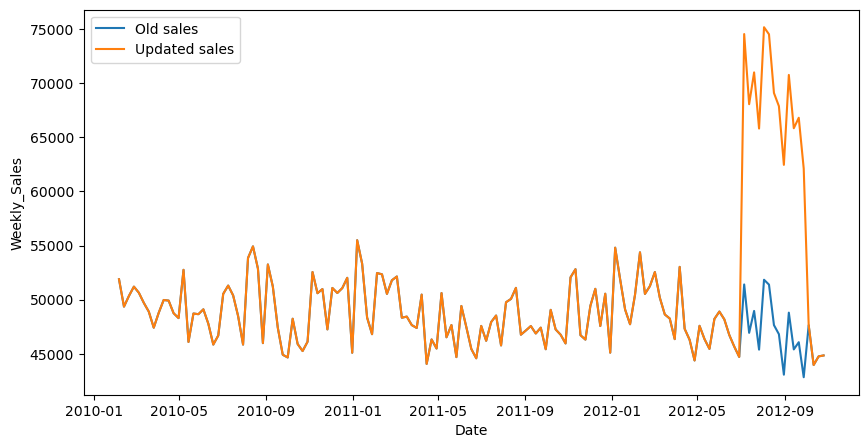

In [9]:
new_sales = df_dept4_marketing.copy()
new_sales['New_sales']=np.where(new_sales['Marketing_Campaign']=="Active",new_sales['Weekly_Sales'] * 1.45 ,new_sales['Weekly_Sales'])
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df_sales_new.query("Dept == '4'"),
    x="Date", y="Weekly_Sales",label='Old sales'
)
sns.lineplot(
    data=new_sales.query("Dept == '4'"),
    x="Date", y="New_sales",label='Updated sales'
)
plt.show()

# 9. Causal Analysis 

Now that our dataset for Causal Analysis is prepared, it is time to proceed with invoking the function. To do so, we must assign values to the pre-period and post-period of intervention, which in this case refers to the marketing campaign.

Upon generating the new dataset, the next step involves transforming it into a suitable format for the library function. The dataset currently contains department numbers within records, which will be restructured to display the weekly sales record for each department. Additionally, certain columns have been removed to prevent any potential confusion in the future.

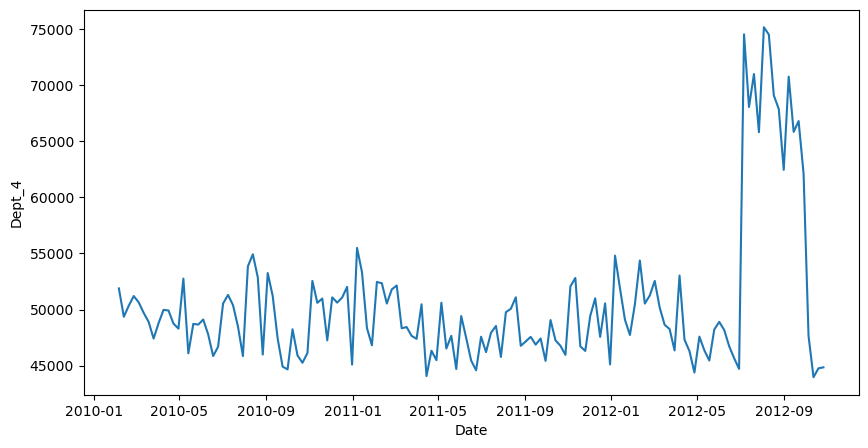

In [10]:
df_sales_causal=new_sales.pivot(index="Date", columns="Dept", values="New_sales")
df_sales_causal.columns=['Dept_1', 'Dept_2', 'Dept_3', 'Dept_4', 'Dept_5']
df_sales_causal=df_sales_causal.sort_values(by='Date')
df_final=df_sales_causal.drop(['Dept_1', 'Dept_2', 'Dept_3', 'Dept_5'],axis=1)
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_final,x="Date", y="Dept_4")
plt.show()

In [11]:
marketing_pre_period=['2010-02-05','2012-06-29']
marketing_post_period=['2012-07-06','2012-10-26']
impact = CausalImpact(df_final, marketing_pre_period, marketing_post_period)


In [12]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    63253.19           1075304.21
Prediction (s.d.)         48680.53 (746.74)  827569.08 (12694.61)
95% CI                    [47177.77, 50104.94][802022.08, 851784.02]

Absolute effect (s.d.)    14572.65 (746.74)  247735.13 (12694.61)
95% CI                    [13148.25, 16075.42][223520.19, 273282.13]

Relative effect (s.d.)    29.94% (1.53%)     29.94% (1.53%)
95% CI                    [27.01%, 33.02%]   [27.01%, 33.02%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


# Conclusion based on output:

Following the intervention, the response variable had an average value of approximately 63253.19. Conversely, if the intervention had not taken place, we would have expected an average response of 48680.53. The 95% interval for this hypothetical prediction falls between 47212.46 and 50129.88.

To estimate the causal effect of the intervention on the response variable, we subtract the predicted value from the observed response. This calculation yields an effect of 14572.65, with a 95% interval ranging from 13123.31 to 16040.73. Further analysis is necessary to determine the significance of this effect.

When considering the individual data points collected after the intervention, the overall value of the response variable was 1075304.21. In contrast, if the intervention had not occurred, we would have expected a total of 827569.08. The 95% interval for this prediction is 802611.85 to 852207.98.

It is important to note that these results are presented in absolute numbers. In relative terms, the response variable experienced an increase of +29.94%. The 95% interval for this percentage is 26.96% to 32.95%.

These findings suggest that the positive impact observed during the intervention period is statistically significant and unlikely to be attributed to random fluctuations. However, determining whether this increase holds substantive significance requires comparing the absolute effect (14572.65) to the original goal of the intervention.

The probability of observing these results by random chance is highly unlikely (Bayesian one-tailed tail-area probability p = 0.0). Therefore, the causal effect can be considered statistically significant.